In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as s
import initScripts as script
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = script.loadDataset('H')
df['On'] = df['T-outside'].apply(lambda x : 1 if x <= 15 else 0)
df = df[df['KWH'] != 0]
df['SetT'] = 22

In [3]:
X = df[['T-outside','H-outside','T-inside','H-inside','On','SetT']]
y = df[['KWH']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
randomForest = RandomForestRegressor(random_state = 1, n_estimators= 1400, min_samples_split = 5,min_samples_leaf=1,max_features='sqrt',max_depth=None,bootstrap=True)
randomForest.fit(X_train,y_train)
X20RF = X_test[['T-outside','H-outside','T-inside','H-inside','On','SetT']]
X20RF['On'] = X_test['T-outside'].apply(lambda x: 1 if x <= 20 else 0)
X20RF['KWH']= randomForest.predict(X20RF)
X20 =  X_test[['T-outside','H-outside','T-inside','H-inside','On','SetT']]
X20['KWH']= randomForest.predict(X20)

C:\Users\William.Brach\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


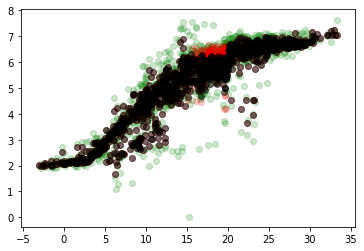

In [5]:
plt.scatter(X_test['T-outside'],y_test['KWH'],c='green',alpha=0.2)
plt.scatter(X20['T-outside'],X20['KWH'],c='red',alpha=0.2)
plt.scatter(X20RF['T-outside'],X20RF['KWH'],c='black',alpha=0.5)


In [6]:
print('Consumption')
print('Default KWH : '+str(y_test['KWH'].sum()) )
print('Random Forrest KWH : '+str(X20RF['KWH'].sum()))
print('Euro/day')
print('Default KWH : '+str(y_test['KWH'].sum()* 0.13) )
print('Random Forrest KWH : '+str(X20RF['KWH'].sum()* 0.13))
print('\nNumber of days : '+str(len(y_test)/24))

Consumption
Default KWH : 6399.812
Random Forrest KWH : 6296.971899234022
Euro/day
Default KWH : 831.97556
Random Forrest KWH : 818.6063469004229

Number of days : 51.25


In [9]:
y_test['KWH'][(X_test['T-outside'] > 15) & (X_test['T-outside'] < 20 )].sum()

1519.577

In [10]:
X20RF['KWH'][(X20RF['T-outside'] > 15) & (X20RF['T-outside'] < 20 )].sum()

1438.7299436386058

In [11]:
X20['KWH'][(X20['T-outside'] > 15) & (X20['T-outside'] < 20 )].sum()

1524.607771471576